In [6]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
%matplotlib inline
plt.rcParams['font.family'] = 'NanumGothic'
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('float_format', '{:f}'.format)

In [8]:
films=pd.read_csv('../01.Data_Collection/films_updated.csv')

In [10]:
films.head()

,영화명,영화코드,개봉일,대표국적,국적,장르,등급,영화형태,영화구분,제작사,배급사,상영횟수,전국스크린수,전국매출액,전국관객수,서울매출액,서울관객수,F-rated,감독,대표감독,감독코드,감독성별,감독_대표역할,감독필모,작가,대표작가,대표작가(필명),작가코드,작가성별,작가_대표역할,작가필모,배우,주연배우,배역명,배우코드,배우성별,배우_대표역할,배우필모
0,워킹걸,20147947,2015-01-07,한국,한국,"코미디,멜로/로맨스",청소년관람불가,장편,일반영화,"(주)홍필름,(주)수필름",메가박스중앙(주)플러스엠,7077,308,1.183887e+09,149181,389163479,49874,1,정범식,정범식,10061758,남자,감독,공포체험단 곤지암편|천문: 하늘에 묻는다|곤지암|워킹걸|미쓰GO|외톨이|기담|무서운...,정범식,정범식,정범식,10061758,남자,감독,공포체험단 곤지암편|천문: 하늘에 묻는다|곤지암|워킹걸|미쓰GO|외톨이|기담|무서운...,"조여정,클라라,김태우,배유람,정범식,정범식,박주희,백경인,조은영,손진우,배성우,유찬...",조여정,백보희,10066680,여자,배우,기생충|워킹걸|인간중독|표적|후궁 : 제왕의 첩|방자전|흡혈형사 나도열
1,설해,20124398,2015-01-08,한국,한국,"멜로/로맨스,드라마",12세이상관람가,장편,독립/예술영화,(주)맑음영화사,"(주)마인스 엔터테인먼트,주식회사 마운틴픽쳐스",335,34,2.076750e+07,2796,10191000,1317,0,김정권,김정권,10005546,남자,감독,설해|그 남자의 책 198쪽|바보|화성으로 간 사나이|동감|귀소,"김정권, 김군영",김정권,김정권,10005546,남자,감독,설해|그 남자의 책 198쪽|바보|화성으로 간 사나이|동감|귀소,"박해진,이영아,송재희,전무송,최원주,이상민,이기열,윤기호,김수환,김정권,김혜진,박재...",박해진,상우,20126329,남자,배우,치즈인더트랩|설해|젓가락
2,오늘의 연애,20142407,2015-01-14,한국,한국,"멜로/로맨스,코미디",15세이상관람가,장편,일반영화,(주)팝콘에프앤엠,씨제이이앤엠(주),47237,709,1.492465e+10,1891993,3951958987,480061,0,박진표,박진표,10029363,남자,감독,오늘의 연애|공범|내 사랑 내 곁에|그놈 목소리|너는 내 운명|죽어도 좋아|신비한 ...,"박진표, 이병헌",박진표,박진표,10029363,남자,감독,오늘의 연애|공범|내 사랑 내 곁에|그놈 목소리|너는 내 운명|죽어도 좋아|신비한 ...,"이승기,문채원,이서진,장진우,이경진,이동진,임하룡,이상협,김광규,김부선,가인,임종윤...",이승기,준수,10056227,남자,배우,궁합|오늘의 연애
3,허삼관,20131262,2015-01-14,한국,한국,드라마,12세이상관람가,장편,일반영화,"(주)두타연,(주)판타지오픽쳐스",(주)넥스트엔터테인먼트월드(NEW),27661,621,7.405416e+09,955175,1879461269,232983,0,하정우,하정우,10087253,남자,배우,백두산|PMC: 더 벙커|클로젯|신과함께-인과 연|1987|신과함께-죄와 벌|서서평...,"하정우, 김주호",하정우,하정우,10087253,남자,배우,백두산|PMC: 더 벙커|클로젯|신과함께-인과 연|1987|신과함께-죄와 벌|서서평...,"하정우,하지원,전혜진,장광,주진모,성동일,이경영,김영애,정만식,조진웅,김기천,김성균...",하정우,허삼관,10087253,남자,배우,백두산|PMC: 더 벙커|클로젯|신과함께-인과 연|1987|신과함께-죄와 벌|서서평...
4,고양이 장례식,20144601,2015-01-15,한국,한국,멜로/로맨스,12세이상관람가,장편,독립/예술영화,영화 고양이 장례식 제작 조합,(주)인디플러그,394,46,2.320090e+07,2865,17496200,2146,0,이종훈,이종훈,10057421,남자,감독,고양이 장례식|심판의날,이종훈,이종훈,이종훈,10057421,남자,감독,고양이 장례식|심판의날,"강인,박세영,정겨운,강신유,신무호,김민지,이민희,남기준,민지,김병춘,김도영,차민지",강인,NaN,10005001,남자,배우,고양이 장례식|순정만화|앨빈과 슈퍼밴드|꽃미남 연쇄 테러 사건


# 성별에 따른 감독 제작비 구하기
전국관객수 기준으로 성별에 따른 TOP5 영화의 값을 찾는다. 그 후, 인터넷 검색을 통해 제작비를 비교할 예정.
- 가설 1) 흥행작들은 제작비를 많이 받았을 것이다 -> 자본주의 사회 논리
- 가설 2) 하지만....남자 감독들에 비해 여자 감독들은 제작비를 덜 받았을 것이다.

In [11]:
start=films.sort_values(by=['전국관객수'],axis=0, ascending=False)

In [12]:
start.head()

,영화명,영화코드,개봉일,대표국적,국적,장르,등급,영화형태,영화구분,제작사,배급사,상영횟수,전국스크린수,전국매출액,전국관객수,서울매출액,서울관객수,F-rated,감독,대표감독,감독코드,감독성별,감독_대표역할,감독필모,작가,대표작가,대표작가(필명),작가코드,작가성별,작가_대표역할,작가필모,배우,주연배우,배역명,배우코드,배우성별,배우_대표역할,배우필모
588,극한직업,20182530,2019-01-23,한국,한국,코미디,15세이상관람가,장편,일반영화,"(주)어바웃필름,영화사 해그림 주식회사,씨제이이앤엠(주)",씨제이이앤엠(주),292578,1978,1.396480e+11,16264944,31858660536,3638287,0,이병헌,이병헌,20125862,남자,감독,드림(가제)|극한직업|레슬러|바람 바람 바람|스물|오늘의 연애|타짜-신의 손|힘내세...,문충일,문충일,문충일,20303529,남자,시나리오(각본),극한직업,"류승룡,이하늬,진선규,이동휘,공명,양현민,장진희,허준석,한준우,김명준,나철,정재광",류승룡,고반장,10019065,남자,배우,입술은 안돼요(가제)|인생은 아름다워(가제)|극한직업|7년의 밤|염력|제5열|서울역...
421,신과함께-죄와 벌,20150976,2017-12-20,한국,한국,"판타지,드라마",12세이상관람가,장편,일반영화,"리얼라이즈픽쳐스(주),(주)덱스터스튜디오",롯데컬처웍스(주)롯데엔터테인먼트,213315,1912,1.156990e+11,14410754,27530825087,3346172,0,김용화,김용화,10005151,남자,감독,백두산|신과함께-인과 연|신과함께-죄와 벌|미스터 고|마이 웨이|국가대표 완결판-못...,김용화,김용화,김용화,10005151,남자,감독,백두산|신과함께-인과 연|신과함께-죄와 벌|미스터 고|마이 웨이|국가대표 완결판-못...,"하정우,차태현,주지훈,김향기,마동석,김동욱,도경수,오달수,임원희,장광,정해균,김수안...",하정우,강림,10087253,남자,배우,백두산|PMC: 더 벙커|클로젯|신과함께-인과 연|1987|신과함께-죄와 벌|서서평...
70,베테랑,20148048,2015-08-05,한국,한국,"액션,드라마",15세이상관람가,장편,일반영화,"(주)외유내강,(주)필름케이",씨제이이앤엠(주),199307,1064,1.050250e+11,13395400,26766369950,3290366,0,류승완,류승완,10019069,남자,감독,엑시트|사바하|군함도|군함도 감독판|베테랑|베를린|평양성|부당거래|해결사|다찌마와리...,류승완,류승완,류승완,10019069,남자,감독,엑시트|사바하|군함도|군함도 감독판|베테랑|베를린|평양성|부당거래|해결사|다찌마와리...,"황정민,유아인,유해진,오달수,장윤주,김시후,오대환,정웅인,정만식,송영창,진경,유인영...",황정민,서도철,10090290,남자,배우,인질(가제)|다만 악에서 구하소서|공작|군함도|군함도 감독판|아수라|곡성|검사외전|...
66,암살,20148851,2015-07-22,한국,한국,"액션,드라마",15세이상관람가,장편,일반영화,(주)케이퍼필름,(주)쇼박스,175213,1519,9.846313e+10,12705700,25306651181,3155960,1,최동훈,최동훈,10072187,남자,감독,"도청(가제)|암살|도둑들|전우치|중천|타짜|소년, 천국에 가다|그때 그 사람들|범죄...","이기철, 최동훈",이기철,이기철,20128927,남자,시나리오(각본),도청(가제)|암살|도둑들|가위|난시청지역,"전지현,이정재,하정우,오달수,조진웅,이경영,최덕문,김의성,박병은,김홍파,강용빈,홍성...",전지현,안옥윤,10061467,여자,배우,암살|베를린|도둑들|도둑들 영화를 만들다|블러드|슈퍼맨이었던 사나이|데이지|내 여자...
510,신과함께-인과 연,20186202,2018-08-01,한국,한국,"판타지,드라마",12세이상관람가,장편,일반영화,"리얼라이즈픽쳐스(주),(주)덱스터스튜디오",롯데컬처웍스(주)롯데엔터테인먼트,180042,2235,1.024770e+11,12253247,22905551759,2636542,0,김용화,김용화,10005151,남자,감독,백두산|신과함께-인과 연|신과함께-죄와 벌|미스터 고|마이 웨이|국가대표 완결판-못...,"김용화, 강지원",김용화,김용화,10005151,남자,감독,백두산|신과함께-인과 연|신과함께-죄와 벌|미스터 고|마이 웨이|국가대표 완결판-못...,"하정우,주지훈,김향기,마동석,김동욱,이정재,김기태,오희준,도경수,이준혁,이수봉,이용...",하정우,도금연,10087253,남자,배우,백두산|PMC: 더 벙커|클로젯|신과함께-인과 연|1987|신과함께-죄와 벌|서서평...


In [13]:
start_man= start[start['감독성별']=='남자']

In [14]:
start_man.head(6)

,영화명,영화코드,개봉일,대표국적,국적,장르,등급,영화형태,영화구분,제작사,배급사,상영횟수,전국스크린수,전국매출액,전국관객수,서울매출액,서울관객수,F-rated,감독,대표감독,감독코드,감독성별,감독_대표역할,감독필모,작가,대표작가,대표작가(필명),작가코드,작가성별,작가_대표역할,작가필모,배우,주연배우,배역명,배우코드,배우성별,배우_대표역할,배우필모
588,극한직업,20182530,2019-01-23,한국,한국,코미디,15세이상관람가,장편,일반영화,"(주)어바웃필름,영화사 해그림 주식회사,씨제이이앤엠(주)",씨제이이앤엠(주),292578,1978,1.396480e+11,16264944,31858660536,3638287,0,이병헌,이병헌,20125862,남자,감독,드림(가제)|극한직업|레슬러|바람 바람 바람|스물|오늘의 연애|타짜-신의 손|힘내세...,문충일,문충일,문충일,20303529,남자,시나리오(각본),극한직업,"류승룡,이하늬,진선규,이동휘,공명,양현민,장진희,허준석,한준우,김명준,나철,정재광",류승룡,고반장,10019065,남자,배우,입술은 안돼요(가제)|인생은 아름다워(가제)|극한직업|7년의 밤|염력|제5열|서울역...
421,신과함께-죄와 벌,20150976,2017-12-20,한국,한국,"판타지,드라마",12세이상관람가,장편,일반영화,"리얼라이즈픽쳐스(주),(주)덱스터스튜디오",롯데컬처웍스(주)롯데엔터테인먼트,213315,1912,1.156990e+11,14410754,27530825087,3346172,0,김용화,김용화,10005151,남자,감독,백두산|신과함께-인과 연|신과함께-죄와 벌|미스터 고|마이 웨이|국가대표 완결판-못...,김용화,김용화,김용화,10005151,남자,감독,백두산|신과함께-인과 연|신과함께-죄와 벌|미스터 고|마이 웨이|국가대표 완결판-못...,"하정우,차태현,주지훈,김향기,마동석,김동욱,도경수,오달수,임원희,장광,정해균,김수안...",하정우,강림,10087253,남자,배우,백두산|PMC: 더 벙커|클로젯|신과함께-인과 연|1987|신과함께-죄와 벌|서서평...
70,베테랑,20148048,2015-08-05,한국,한국,"액션,드라마",15세이상관람가,장편,일반영화,"(주)외유내강,(주)필름케이",씨제이이앤엠(주),199307,1064,1.050250e+11,13395400,26766369950,3290366,0,류승완,류승완,10019069,남자,감독,엑시트|사바하|군함도|군함도 감독판|베테랑|베를린|평양성|부당거래|해결사|다찌마와리...,류승완,류승완,류승완,10019069,남자,감독,엑시트|사바하|군함도|군함도 감독판|베테랑|베를린|평양성|부당거래|해결사|다찌마와리...,"황정민,유아인,유해진,오달수,장윤주,김시후,오대환,정웅인,정만식,송영창,진경,유인영...",황정민,서도철,10090290,남자,배우,인질(가제)|다만 악에서 구하소서|공작|군함도|군함도 감독판|아수라|곡성|검사외전|...
66,암살,20148851,2015-07-22,한국,한국,"액션,드라마",15세이상관람가,장편,일반영화,(주)케이퍼필름,(주)쇼박스,175213,1519,9.846313e+10,12705700,25306651181,3155960,1,최동훈,최동훈,10072187,남자,감독,"도청(가제)|암살|도둑들|전우치|중천|타짜|소년, 천국에 가다|그때 그 사람들|범죄...","이기철, 최동훈",이기철,이기철,20128927,남자,시나리오(각본),도청(가제)|암살|도둑들|가위|난시청지역,"전지현,이정재,하정우,오달수,조진웅,이경영,최덕문,김의성,박병은,김홍파,강용빈,홍성...",전지현,안옥윤,10061467,여자,배우,암살|베를린|도둑들|도둑들 영화를 만들다|블러드|슈퍼맨이었던 사나이|데이지|내 여자...
510,신과함께-인과 연,20186202,2018-08-01,한국,한국,"판타지,드라마",12세이상관람가,장편,일반영화,"리얼라이즈픽쳐스(주),(주)덱스터스튜디오",롯데컬처웍스(주)롯데엔터테인먼트,180042,2235,1.024770e+11,12253247,22905551759,2636542,0,김용화,김용화,10005151,남자,감독,백두산|신과함께-인과 연|신과함께-죄와 벌|미스터 고|마이 웨이|국가대표 완결판-못...,"김용화, 강지원",김용화,김용화,10005151,남자,감독,백두산|신과함께-인과 연|신과함께-죄와 벌|미스터 고|마이 웨이|국가대표 완결판-못...,"하정우,주지훈,김향기,마동석,김동욱,이정재,김기태,오희준,도경수,이준혁,이수봉,이용...",하정우,도금연,10087253,남자,배우,백두산|PMC: 더 벙커|클로젯|신과함께-인과 연|1987|신과함께-죄와 벌|서서평...
356,택시운전사,20162869,2017-08-02,한국,한국,드라마,15세이상관람가,장편,일반영화,더램프(주),(주)쇼박스,184198,1906,9.528475e+10,12099971,22186916199,2729932,1,장훈,장훈,10060674,남자,감독,택시운전사|고지전|의형제|영화는 영화다|시간|활|빈집|신부수업|사마리아|헤라퍼플,엄유나,엄유나,엄유나,20187477,여자,시나리오(각본),말모이|택시운전사|번개와 춤을,"이수민,송강호,토마스 크레취만,유해진,류준열,박혁권,최귀화,이창섭,이호균,서정우,송...",송강호,-,10037018,남자,배우,비상선언|나랏말싸미|기생충|마약왕|택시운전사|제5열|밀정|사도|변호인|관상|설국열차...


In [15]:
start_woman= start[start['감독성별']=='여자']

In [16]:
start_woman.head(5)

,영화명,영화코드,개봉일,대표국적,국적,장르,등급,영화형태,영화구분,제작사,배급사,상영횟수,전국스크린수,전국매출액,전국관객수,서울매출액,서울관객수,F-rated,감독,대표감독,감독코드,감독성별,감독_대표역할,감독필모,작가,대표작가,대표작가(필명),작가코드,작가성별,작가_대표역할,작가필모,배우,주연배우,배역명,배우코드,배우성별,배우_대표역할,배우필모
611,돈,20176103,2019-03-20,한국,한국,범죄,15세이상관람가,장편,일반영화,"(주)사나이픽처스,(주)영화사 월광",(주)쇼박스,120808,1431,2.886961e+10,3389035,7287586982,833513,2,박누리,박누리,20151353,여자,조감독,돈|남자가 사랑할 때|베를린|부당거래|서울이 보이냐|더 게임|김관장 대 김관장 대 김관장,박누리,박누리,박누리,20151353,여자,조감독,돈|남자가 사랑할 때|베를린|부당거래|서울이 보이냐|더 게임|김관장 대 김관장 대 김관장,"류준열,유지태,조우진,원진아,박명신,이화룡,오희준,정기섭,차래형",류준열,조일현,20208626,남자,배우,봉오동 전투|돈|뺑반|리틀 포레스트|독전: 익스텐디드 컷|독전|침묵|택시운전사|더 ...
492,탐정: 리턴즈,20178161,2018-06-13,한국,한국,"코미디,범죄",15세이상관람가,장편,일반영화,(주)크리픽쳐스,씨제이이앤엠(주),107909,1041,2.686572e+10,3148038,5989673378,680077,1,이언희,이언희,10056602,여자,감독,탐정: 리턴즈|미씽: 사라진 여자|타이밍|어깨 너머의 연인|해피 에로 크리스마스|....,정한진,정한진,정한진,20279790,남자,시나리오(각본),탐정: 리턴즈,"권상우,성동일,이광수,서영희,이일화,남명렬,손담비,최성원,김동욱,박성일,오희준,이광...",권상우,도희,10002387,남자,배우,신의 한 수: 귀수편|두번할까요|히트맨|탐정: 리턴즈|탐정 : 더 비기닝|그림자 애...
582,말모이,20184105,2019-01-09,한국,한국,드라마,12세이상관람가,장편,일반영화,더램프(주),롯데컬처웍스(주)롯데엔터테인먼트,87841,1203,2.368264e+10,2812444,5900912990,681266,2,엄유나,엄유나,20187477,여자,시나리오(각본),말모이|택시운전사|번개와 춤을,엄유나,엄유나,엄유나,20187477,여자,시나리오(각본),말모이|택시운전사|번개와 춤을,"유해진,윤계상,김홍파,우현,김태훈,김선영,민진웅,이성욱,조현철,오희준,정기섭,허성태...",유해진,박종환,10054128,남자,배우,봉오동 전투|승리호(가제)|말모이|완벽한 타인|레슬러|1987|택시운전사|공조|럭키...
448,리틀 포레스트,20170841,2018-02-28,한국,한국,드라마,전체관람가,장편,일반영화,(주)영화사수박,메가박스중앙(주)플러스엠,68422,884,1.192482e+10,1505560,3853015885,474626,2,임순례,임순례,10058650,여자,감독,리틀 포레스트|글로리데이|제보자|남쪽으로 튀어|로맨스 조|소와 함께 여행하는 법|날...,황성구,황성구,황성구,10090124,남자,시나리오(각본),리틀 포레스트|박열|찌라시: 위험한 소문|나는 왕이로소이다|간기남|특수본|식객2 :...,"김태리,류준열,문소리,진기주,홍성덕,이광용,이상준,김재훈,이유진,김정은,김주은,이태...",김태리,유정,20201026,여자,배우,승리호(가제)|리틀 포레스트|1987|아가씨|아가씨(확장판)|문영|문영 단편|락 아...
396,부라더,20172603,2017-11-02,한국,한국,코미디,12세이상관람가,장편,일반영화,"(주)홍필름,(주)수필름",메가박스중앙(주)플러스엠,54976,889,1.159091e+10,1468301,2357877298,287039,2,장유정,장유정,20110174,여자,감독,정직한 후보|부라더|김종욱 찾기,"장유정, 허성혜",장유정,장유정,20110174,여자,감독,정직한 후보|부라더|김종욱 찾기,"마동석,이동휘,이하늬,류정수,배준수,석정호,신은영,안백승,안승주,채지혜,이성은,이수...",마동석,현정,10021341,남자,배우,나쁜 녀석들: 더 무비|노리개: 그녀의 눈물|악인전|백두산|시동|성난황소|동네사람들...


# 남자 감독 top5 참고: 제목_감독이름 (관객수)
- 극한직업_이병헌(16264944)
- 신과 함께 죄와 벌_김용화 (14410754)
- 베테랑_류승완 (13395400)
- 암살_최동윤 (12705700)
- 택시운전사_장훈 (12099971)

신과 함께 시리즈가 두개 다 top5에 들었지만 신과 함께는 동시제작해서 시리즈별로 상영한 케이스라 뺌...(감독/배우 등등 관계자들 다 똑같음)
http://www.donga.com/news/article/all/20181218/93363011/1


# 여자 감독 top5 참고: 제목_감독이름 (관객수)
- 돈_박누리(3389035)
- 탐정:리턴즈_이언희 (3148038)
- 말모이_엄유나 (2812444)
- 리틀포레스트_엄순례 (1505560)
- 부라더_장유정 (1468301)

In [22]:
money=pd.read_csv('../01.Data_Collection/movie_money_power.csv')

성별에 따른 흥행작품의 손익분기점과 제작비 입력. 
* 제작비는 '억' 단위. 
* 관객수- 손익분기점 이름을 무엇으로 정할 지 몰라서 일단 이름...은 이렇게 설정함.

In [23]:
money.head()

,영화명,제작비,관객수,손익분기점,관객수 - 손익분기,대표감독,감독성별
0,극한직업,60,16264944,2000000,14264944,이병헌,남자
1,신과함께-죄와 벌,400,14410754,6000000,8410754,김용화,남자
2,베테랑,60,13395400,2800000,10595400,류승완,남자
3,암살,220,12705700,6500000,6205700,최동환,남자
4,택시운전사,150,12099971,4500000,7599971,장훈,남자


In [24]:
money

,영화명,제작비,관객수,손익분기점,관객수 - 손익분기,대표감독,감독성별
0,극한직업,60,16264944,2000000,14264944,이병헌,남자
1,신과함께-죄와 벌,400,14410754,6000000,8410754,김용화,남자
2,베테랑,60,13395400,2800000,10595400,류승완,남자
3,암살,220,12705700,6500000,6205700,최동환,남자
4,택시운전사,150,12099971,4500000,7599971,장훈,남자
5,돈,80,3389035,2000000,1389035,박누리,여자
6,탐정:리턴즈,50,3148038,1800000,1348038,이언희,여자
7,말모이,110,281244,3000000,-2718756,엄유나,여자
8,리틀포레스트,15,1505560,800000,705560,임순례,여자
9,부라더,20,1468301,1000000,468301,장유정,여자


In [25]:
money['제작비'].describe()

count     10.000000
mean     116.500000
std      117.379962
min       15.000000
25%       52.500000
50%       70.000000
75%      140.000000
max      400.000000
Name: 제작비, dtype: float64

In [38]:
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

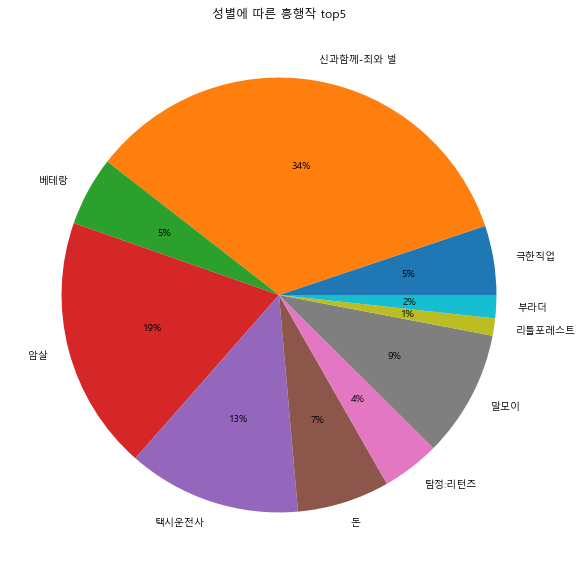

In [56]:
money_labels = money['영화명']
money_counts = money['제작비']

plt.figure(1, figsize=(20,10))

plt.subplot(aspect=1, title='성별에 따른 흥행작 top5')

ax = plt.pie(money_counts, labels=money_labels, autopct='%.0f%%')


#ax = money['제작비'].plot.pie(label='', autopct='%.2f%%')

5년 데이터 안에서 성별에 따른 흥행작의 제작비 파이를 차트로 나타냄. 그 후, 성별에 따른 제작비를 보여줌. 

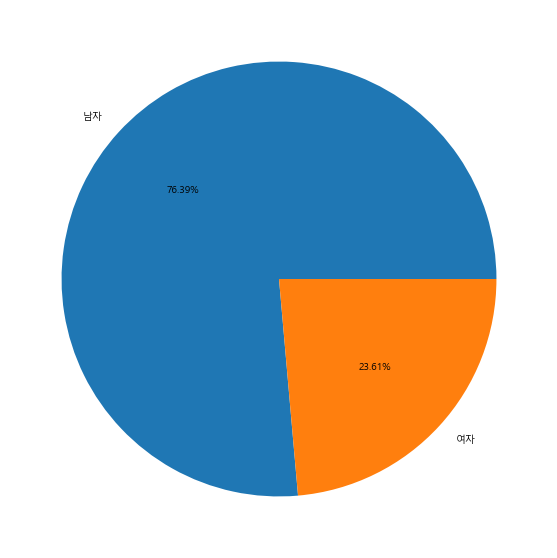

In [44]:
plt.rcParams["figure.figsize"] = (20,10)
money.groupby('감독성별')['제작비'].sum().sort_values(ascending=False).plot(kind='pie', label='', autopct='%.2f%%')

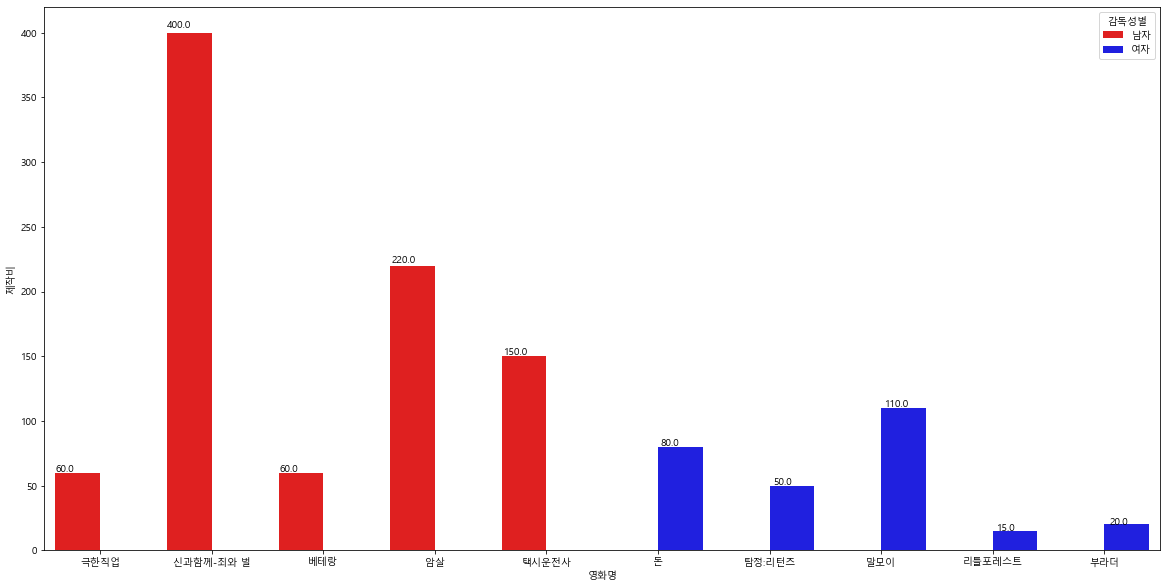

In [57]:
#ax= money['제작비'].plot(kind='bar', title='감독 성별에 따른 제작비', colors=['red', 'blue'])
#label = ['극한직업', '신과함께-죄와벌', '베테랑', '암살', '택시운전사', '돈', '탐정:리턴즈', '말모이', '리틀포레스트', '부라더']


ax = sns.barplot(x=money['영화명'], y=money['제작비'],hue=money['감독성별'], data=money, palette=['red', 'blue'])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.01))


In [50]:
director_woman= money[money['감독성별']=='여자']

In [30]:
director_man= money[money['감독성별']=='남자']

In [31]:
director_woman.head()

,영화명,제작비,관객수,손익분기점,관객수 - 손익분기,대표감독,감독성별
5,돈,80,3389035,2000000,1389035,박누리,여자
6,탐정:리턴즈,50,3148038,1800000,1348038,이언희,여자
7,말모이,110,281244,3000000,-2718756,엄유나,여자
8,리틀포레스트,15,1505560,800000,705560,임순례,여자
9,부라더,20,1468301,1000000,468301,장유정,여자


In [42]:
money.head()

,영화명,제작비,관객수,손익분기점,관객수 - 손익분기,대표감독,감독성별
0,극한직업,60,16264944,2000000,14264944,이병헌,남자
1,신과함께-죄와 벌,400,14410754,6000000,8410754,김용화,남자
2,베테랑,60,13395400,2800000,10595400,류승완,남자
3,암살,220,12705700,6500000,6205700,최동환,남자
4,택시운전사,150,12099971,4500000,7599971,장훈,남자


https://rfriend.tistory.com/411

- 여자 평균 제작비: 55억
- 남자 평균 제작비: 178억4

-여성 평균 손익분기점: 172만
-남성 평균 손익분기점: 436만

In [60]:
directot_debut=pd.read_csv('../01.Data_Collection/directot_debut.csv')

In [138]:
from IPython.display import Image, HTML

joo = pd.DataFrame(['<img src="joo_director.png"/>'], columns = ['Image'])

HTML(joo.to_html(escape=False))

,Image
0,


대표적인 여성감독 변영주 감독의 필모를 봐도, 2004년 ~ 2010년/ 2012~ 2019년 공백기가 있는 것을 볼 수 있다. 

# director_lee 데이터 설명.
- 이경미 감독과 류승완 감독은 박찬욱 키즈로 추정되며 1973년생 동갑이다.
- 서로의 배경은 바슷하나 그 이후의 행보가 달라지는 것을 비교했다

두 감독의 데뷔를 기준으로 작품 수를 기입했다. (데뷔 기준: 첫 영화를 찍었을 때. 단편, 졸작 상관 없이)

기사 참고(이경미 감독과 박찬욱 사이는 유명해서, 류승완 감독 기사 넣음.) 
- https://news.joins.com/article/18533713
- https://www.mk.co.kr/star/hot-issues/view/2013/01/64466/

In [92]:
director_lee=pd.read_csv('../01.Data_Collection/director_lee.csv')

In [93]:
director_lee.head()

,감독,년도,작품,감독성별
0,류승완,1996,1,남자
1,류승완,1997,1,남자
2,류승완,1998,1,남자
3,류승완,1999,1,남자
4,류승완,2000,1,남자


In [94]:
director_lee.dtypes

감독      object
년도       int64
작품       int64
감독성별    object
dtype: object

In [79]:
import plotly.express as px
import plotly.graph_objects as go

In [98]:
fig = px.line(director_lee, x="년도", y="작품",  color='감독', title='이경미-류승완 작품 비교')
fig.update_layout(xaxis_rangeslider_visible=True) # 밑에 바가 추가됨

# 그래프 설명 
이경미 감독과 류승완 감독의 공백기를 보았을 때, 이경미 감독 공백기는 연속적으로 있다가 2009년 이후로 2014년까지 이어져 온 것을 볼 수 있다. 하지만 류승완 감독은 1년을 텀으로 영화를 주기적으로 찍었다

# 이경미-류승완 순 제작비 비교

데이터 읽는 방법: 제작비의 단위는 '억'. (예시: 28 -> 28억/ 0.65 -> 6500만원)
- 네이버 필모그래피를 기준으로 두 감독의 필모 순제작비를 비교해본다.
- 순 제작비: 영화를 만드는데 실질적으로 사용한 비용. <-> 총제작비: 순제작비+마켓팅 비용+간접비용.

순 제작비가 안 나옴...(이유: 독립영화, 넷플 지원, 광고 겸 영화인 영화)
- 이경미: 오디션, 잘돼가 무엇이든, 페르소나 
- 류승완: 남자니까 아시잖아요, 다섯개의 시선, 다찌마와lee, 변질헤드, 현대인, 변질헤드, 사진, 유령, 신촌좀비만화, 다찌마와리-악인. 
* 류승완의 다찌마와리-악인은 순제작비가 안나와서 뺌. (제작비: 50억)

In [100]:
cost_lee=pd.read_csv('../01.Data_Collection/lee_ryu_cost.csv')

In [101]:
cost_lee.head()

,영화,감독,순제작비,년도
0,죽거나 나쁘거나,류승완,0.650000,2000
1,아라한 장풍대작전,류승완,70.000000,2004
2,짝패,류승완,25.000000,2006
3,따지마와리-악인,류승완,28.000000,2008
4,부당거래,류승완,32.000000,2010


In [130]:
cost_lee

,영화,감독,순제작비,년도
0,죽거나 나쁘거나,류승완,0.650000,2000
1,아라한 장풍대작전,류승완,70.000000,2004
2,짝패,류승완,25.000000,2006
3,따지마와리-악인,류승완,28.000000,2008
4,부당거래,류승완,32.000000,2010
5,베를린,류승완,100.000000,2012
6,베테랑,류승완,60.000000,2015
7,군함도,류승완,225.000000,2017
8,미쓰 홍당무,이경미,10.000000,2008
9,비밀은 없다,이경미,42.000000,2015


In [119]:
# cost_lee[cost_lee['감독']=='류승완']

,영화,감독,순제작비,년도
0,죽거나 나쁘거나,류승완,0.650000,2000
1,아라한 장풍대작전,류승완,70.000000,2004
2,짝패,류승완,25.000000,2006
3,따지마와리-악인,류승완,28.000000,2008
4,부당거래,류승완,32.000000,2010
5,베를린,류승완,100.000000,2012
6,베테랑,류승완,60.000000,2015
7,군함도,류승완,225.000000,2017


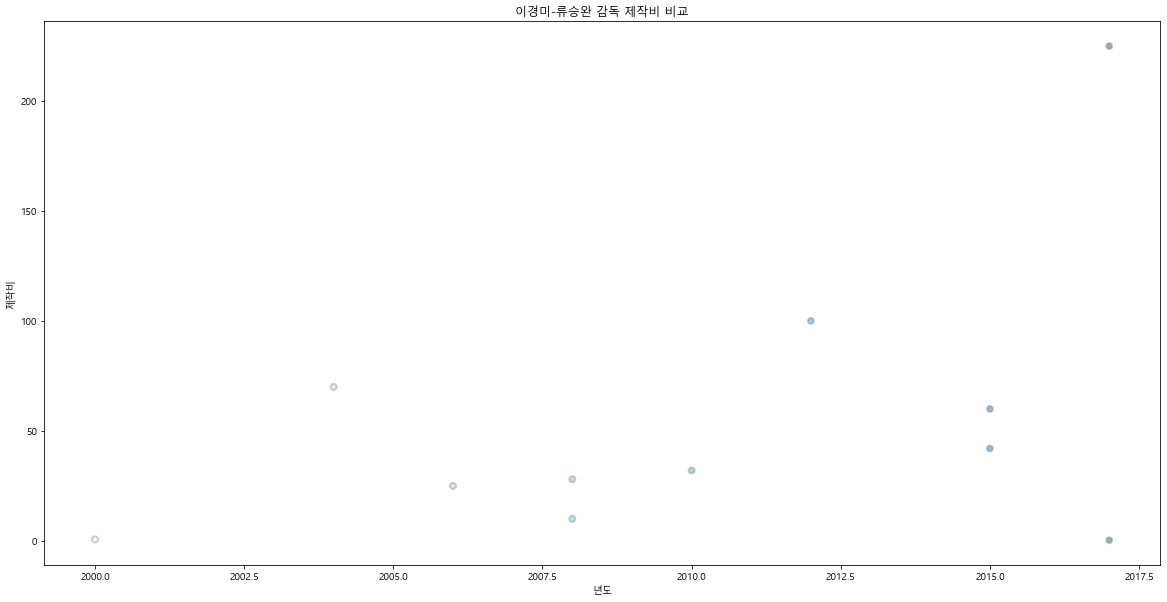

In [129]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
 
# create data
x = cost_lee['년도']
y = cost_lee['순제작비']


# Change color with c and alpha. I map the color to the X axis value.
plt.scatter(x, y, c=x, cmap="Blues", alpha=0.4, edgecolors="grey", linewidth=2)
 
# Add titles (main and on axis)
plt.xlabel("년도")
plt.ylabel("제작비")
plt.title("이경미-류승완 감독 제작비 비교")
 
plt.show()


In [139]:
# 색 다르게 하고 싶다... -> 민주님이 해주셨다.

fig = px.scatter(cost_lee, x="년도", y="순제작비"
                 , color='감독'
             
                , size='순제작비',hover_data =['감독'])
                    
fig.show()

이경미 감독의 2017년 작품 아랫집은....데이터가 너무 작아서 보이지도 않음...(류승완 감독의 2000년 작품도 이하 동일)
- 전체관람가라는 예능에서 제작비를 지원해줬기 때문에 제작비는 3000만원 한도 내에서 제작해야했음.

In [120]:
cost_lee.head()

,영화,감독,순제작비,년도
0,죽거나 나쁘거나,류승완,0.650000,2000
1,아라한 장풍대작전,류승완,70.000000,2004
2,짝패,류승완,25.000000,2006
3,따지마와리-악인,류승완,28.000000,2008
4,부당거래,류승완,32.000000,2010


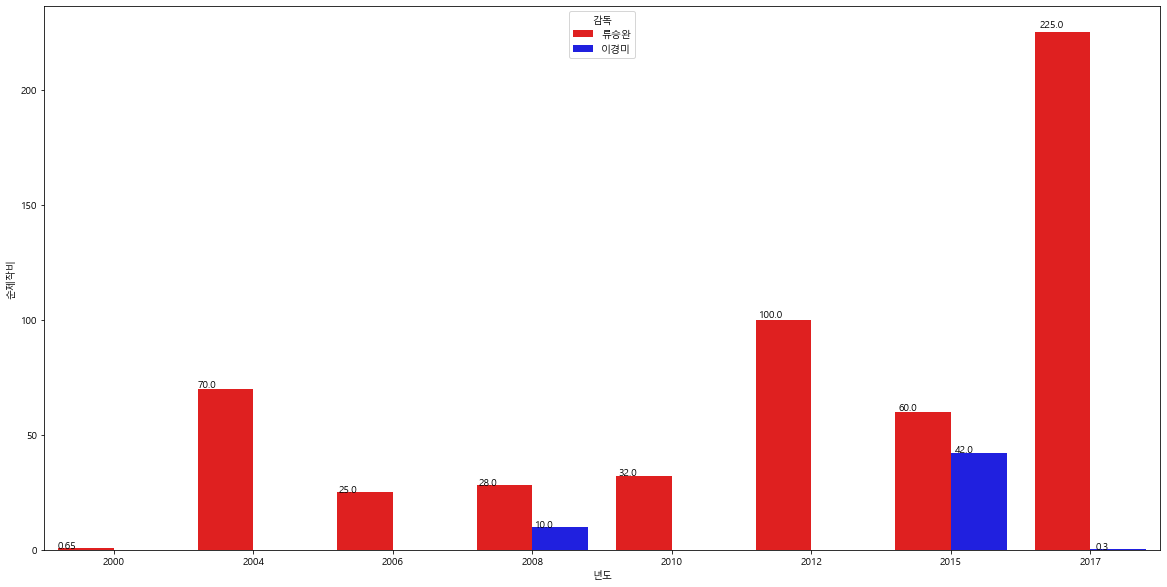

In [136]:

ax = sns.barplot(x=cost_lee['년도'], y=cost_lee['순제작비'],hue=cost_lee['감독'], data=cost_lee, palette=['red', 'blue'])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.01))


# 그래프 해석
- 류승완 감독은 2000년 이후 6500만원이였던 순제작비가 꾸준한 상승세를 보여 2017년에는 군함도(순제작비: 225억)를 찍었다. 류승완 감독의 그래프를 전체적으로 봐도 공백기의 텀이 이경미 감독과 비교했을 때 짧으며 주기적으로 작품을 하는 것을 할 수 있다. 
- 이경미 감독 같은 경우 2008년 미쓰 홍당무 이후 2009년~2014년이 공백기이였다. 긴 공백기를 깨고 2015년 비밀은 없다(장편: 42억), 2017년 전체관람가라는 jtbc 예능을 통해 아랫집(순제작비: 3000만원)이라는 단편 영화를 선보였다.  

In [131]:
'''import plotly.express as px
import pandas as pd
import math

# Load data, define hover text and bubble size
data = cost_lee
df = cost_lee['제작비']
df = df.sort_values(['년도', '감독'])

hover_text = []
bubble_size = []

for index, row in df.iterrows():
    hover_text.append(('영화이름: {영화}<br>'+
                      '순제작비: {순제작비}<br>'+
                      '감독: {감독}<br>'+
                      '년도: {년도}<br>'.format(영화=row['영화'],
                                            감독=row['감독'],
                                            순제작비=row['순제작비'],
                                            년도=row['년도']))
    #bubble_size.append(math.sqrt(row['pop']))

#df['text'] = hover_text
#df['size'] = bubble_size
sizeref = 2.*max(df['size'])/(100**2)

# Dictionary with dataframes for each continent
continent_names = ['류승완', '이경미']
continent_data = {continent:df.query("감독 == '%s'" %continent)
                              for continent in continent_names}

# Create figure
fig = go.Figure()

for continent_name, continent in continent_data.items():
    fig.add_trace(go.Scatter(
        x=continent['년도'], y=continent['제작비'],
        name=continent_name, text=continent['text'],
        marker_size=continent['size'],
        ))

# Tune marker appearance and layout
fig.update_traces(mode='markers', marker=dict(sizemode='area',
                                              sizeref=sizeref, line_width=2))

fig.update_layout(
    title='Life Expectancy v. Per Capita GDP, 2007',
    xaxis=dict(
        title='GDP per capita (2000 dollars)',
        gridcolor='white',
        type='log',
        gridwidth=2,
    ),
    yaxis=dict(
        title='Life Expectancy (years)',
        gridcolor='white',
        gridwidth=2,
    ),
    paper_bgcolor='rgb(243, 243, 243)',
    plot_bgcolor='rgb(243, 243, 243)',
)
fig.show()'''

'import plotly.express as px\nimport pandas as pd\nimport math\n\n# Load data, define hover text and bubble size\ndata = cost_lee\ndf = cost_lee[\'제작비\']\ndf = df.sort_values([\'년도\', \'감독\'])\n\nhover_text = []\nbubble_size = []\n\nfor index, row in df.iterrows():\n    hover_text.append((\'영화이름: {영화}<br>\'+\n                      \'순제작비: {순제작비}<br>\'+\n                      \'감독: {감독}<br>\'+\n                      \'년도: {년도}<br>\'.format(영화=row[\'영화\'],\n                                            감독=row[\'감독\'],\n                                            순제작비=row[\'순제작비\'],\n                                            년도=row[\'년도\']))\n    #bubble_size.append(math.sqrt(row[\'pop\']))\n\n#df[\'text\'] = hover_text\n#df[\'size\'] = bubble_size\nsizeref = 2.*max(df[\'size\'])/(100**2)\n\n# Dictionary with dataframes for each continent\ncontinent_names = [\'류승완\', \'이경미\']\ncontinent_data = {continent:df.query("감독 == \'%s\'" %continent)\n                              for continent in c